In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.gridspec as gridspec
import datetime as dt
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency, f_oneway
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, KFold

In [130]:
#Load the data
data = pd.read_csv('C:/Users/HP/Downloads/Dissertation/new_retail_data.csv')

In [131]:
data.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [132]:
data.tail()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand
302009,2882826.0,53626.0,Dustin Merritt,William14@gmail.com,9.518927e+09,143 Amanda Crescent,Tucson,West Virginia,25242.0,USA,...,2382.233417,Home Decor,Home Depot,Decorations,Average,Same-Day,Cash,Shipped,2.0,Clocks


In [133]:
data.shape

(302010, 30)

In [134]:
data.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301661.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165112,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301661 non-null  float64
 16  Month             30

In [136]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                349
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64


In [137]:
# Drop rows with missing values in relevant columns
data = data.dropna(subset=['Transaction_ID', 'Customer_ID', 'Age', 'Gender', 'Date', 'Total_Purchases', 'Total_Amount', 'Country'])

# Data Visualization

In [138]:
# Age segmentation
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data.loc[:, 'Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [139]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

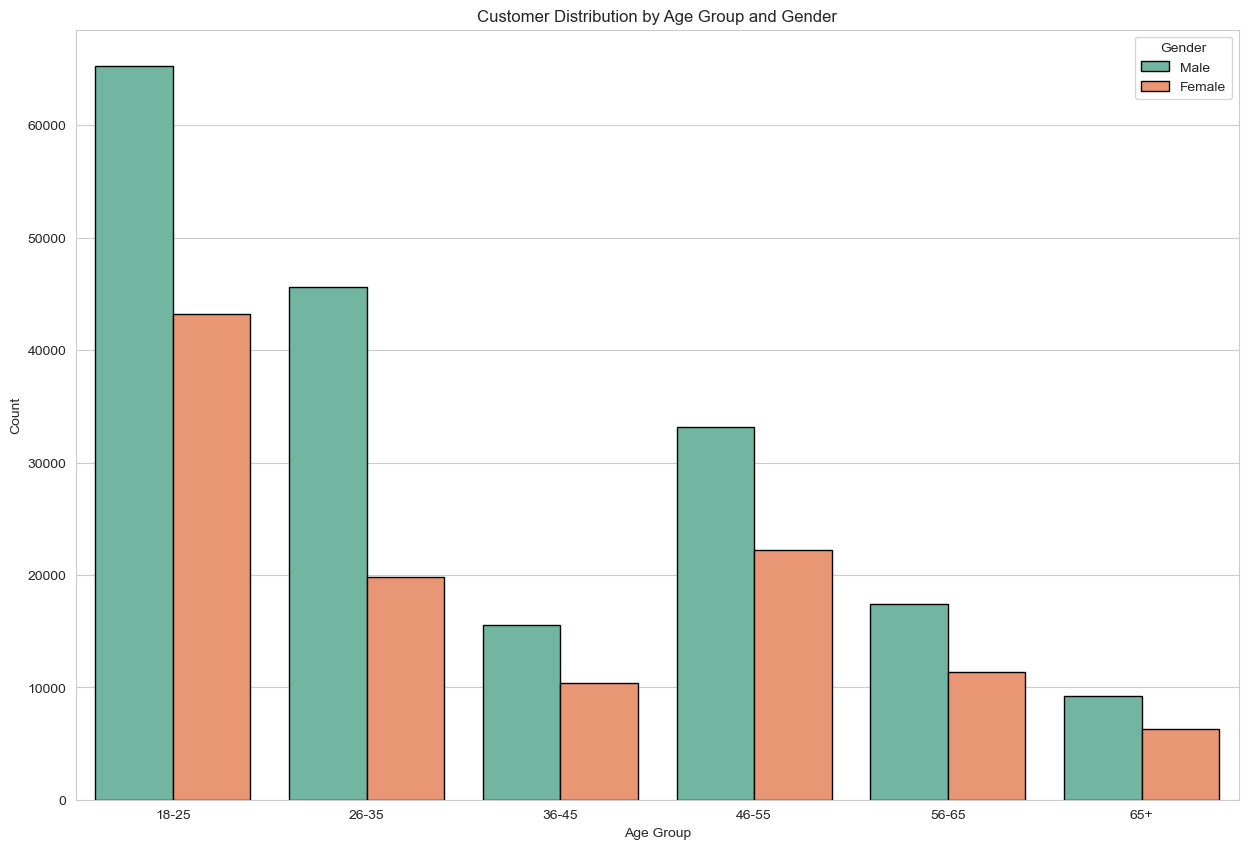

In [140]:
# Plot the distribution of customers by Age Group and Gender
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='Age_Group', hue='Gender', palette='Set2', order=age_labels, edgecolor='black', linewidth=1)
plt.title('Customer Distribution by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

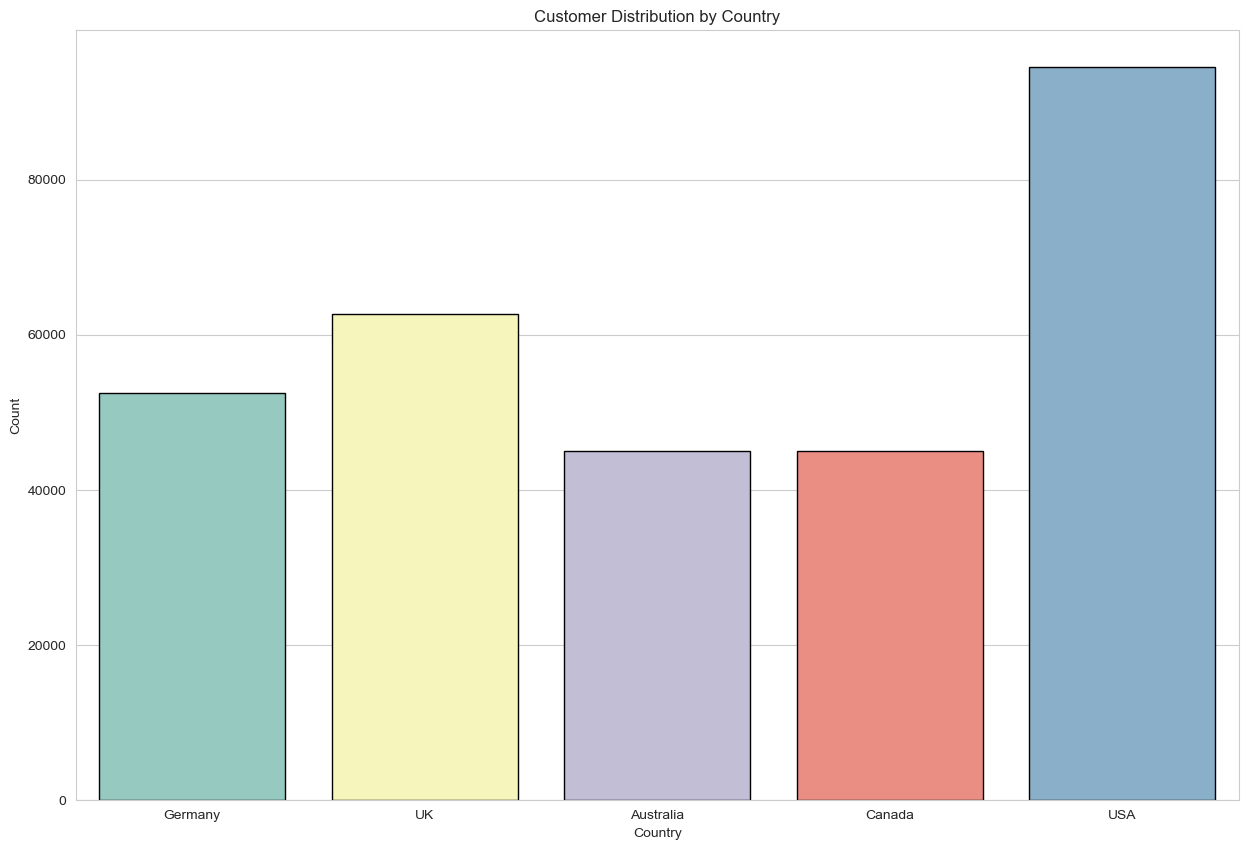

In [141]:
# Plot the distribution of customers by Country
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='Country', palette='Set3', edgecolor='black', linewidth=1)
plt.title('Customer Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# RFM Analysis

In [142]:
# Convert Date column to datetime with error handling
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [143]:
# Ensure Time column is a string
data['Time'] = data['Time'].astype(str)

In [144]:
# Combine Date and Time columns into a single Datetime column
data['Datetime'] = data['Date'].astype(str) + ' ' + data['Time']

In [145]:
# Convert the combined column to a datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

print(data[['Date', 'Time', 'Datetime']].head())

        Date      Time            Datetime
0 2023-09-18  22:03:55 2023-09-18 22:03:55
1 2023-12-31   8:42:04 2023-12-31 08:42:04
2 2023-04-26   4:06:29 2023-04-26 04:06:29
3 2023-05-08  14:55:17 2023-05-08 14:55:17
4 2024-01-10  16:54:07 2024-01-10 16:54:07


In [146]:
data['Datetime'].min(),data['Datetime'].max()

(Timestamp('2023-03-01 00:02:39'), Timestamp('2024-02-29 23:58:43'))

In [147]:
PRESENT = dt.datetime(2024, 3, 1)
data['Date'] = pd.to_datetime(data['Date'])

In [148]:
rfm = data.groupby('Customer_ID').agg({
    'Date': lambda date: (PRESENT - date.max()).days,
    'Transaction_ID': 'nunique',
    'Total_Amount': 'sum'
})

In [149]:
rfm.rename(columns={'Date': 'Recency', 'Transaction_ID': 'Frequency', 'Total_Amount': 'MonetaryValue'}, inplace=True)
rfm.head()

,Recency,Frequency,MonetaryValue
Customer_ID,,,
10000.0,103,4,5007.566357
10001.0,105,5,8136.462824
10002.0,95,5,4104.013951
10003.0,228,2,2340.496447
10004.0,31,2,2356.516683


In [150]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,86685.000000,86685.000000,86685.000000
mean,97.359301,3.428621,4726.592157
std,83.760089,1.733760,3193.616233
min,1.000000,1.000000,10.304530
25%,31.000000,2.000000,2278.677526
50%,73.000000,3.000000,4203.528633
75%,143.000000,4.000000,6564.066119
max,366.000000,13.000000,29241.776770


In [151]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'], 4, ['4','3','2','1'])

In [152]:
rfm.head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score
Customer_ID,,,,,,
10000.0,103,4,5007.566357,3,2,2
10001.0,105,5,8136.462824,3,1,1
10002.0,95,5,4104.013951,3,1,3
10003.0,228,2,2340.496447,4,4,3
10004.0,31,2,2356.516683,1,4,3


In [153]:
rfm['RFM_Score'] = rfm.R_Score.astype(str)+ rfm.F_Score.astype(str) + rfm.M_Score.astype(str)
rfm.head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
Customer_ID,,,,,,,
10000.0,103,4,5007.566357,3,2,2,322
10001.0,105,5,8136.462824,3,1,1,311
10002.0,95,5,4104.013951,3,1,3,313
10003.0,228,2,2340.496447,4,4,3,443
10004.0,31,2,2356.516683,1,4,3,143


In [154]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('MonetaryValue', ascending=False).head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
Customer_ID,,,,,,,
48453.0,8,13,29241.776770,1,1,1,111
42972.0,25,12,25654.737170,1,1,1,111
64700.0,7,10,23721.566430,1,1,1,111
90769.0,12,12,23446.433887,1,1,1,111
47382.0,5,13,23015.431924,1,1,1,111


In [155]:
total_top_customers = rfm[rfm['RFM_Score'] == '111']['RFM_Score'].count()
print("Total number of customers with RFM score '111':", total_top_customers)

Total number of customers with RFM score '111': 5882


# Clustering RFM Analysis result using K-means

In [156]:
# Normalise the data
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

In [157]:
# Standardise the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

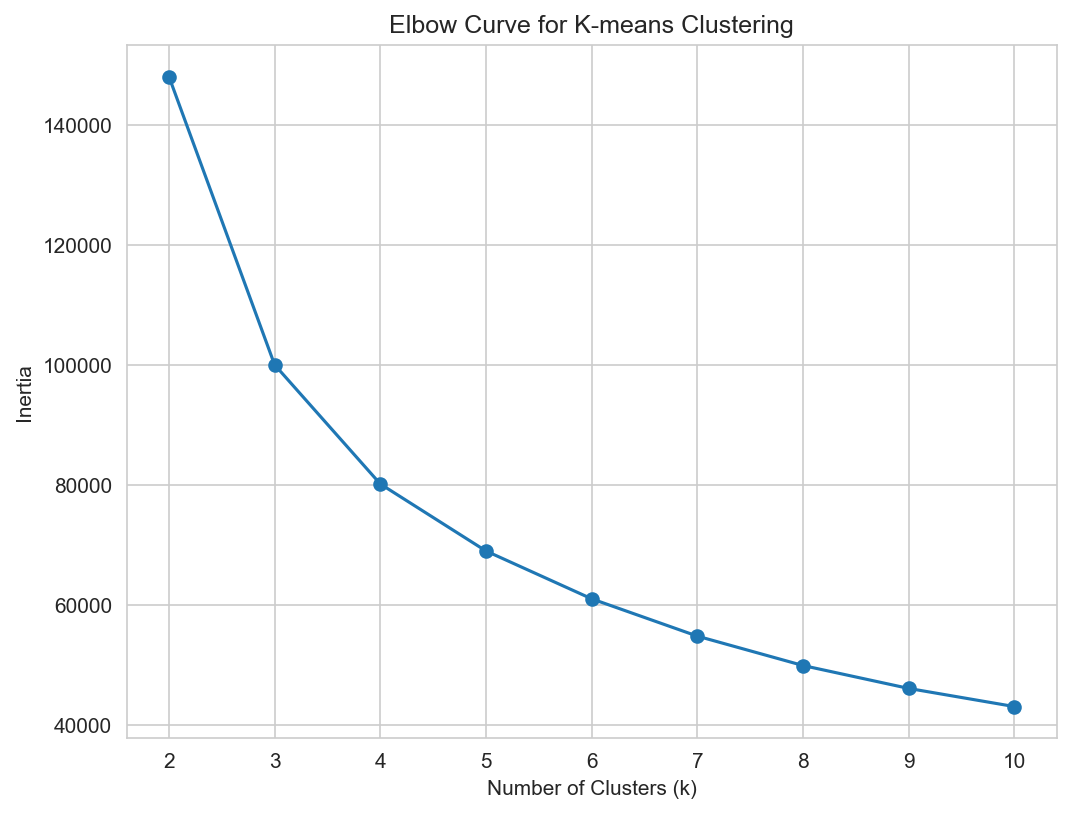

In [158]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(rfm_normalized)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [159]:
# Apply K-means clustering with the optimal number of clusters (assumed to be 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_normalized)

# Assign cluster labels to the original DataFrame
rfm['Cluster'] = kmeans.labels_

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [160]:
# Calculate Silhouette Score for 4 clusters
silhouette_avg = silhouette_score(rfm_normalized, rfm['Cluster'])
print("Silhouette Score: ", silhouette_avg)

# Calculate Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(rfm_normalized, rfm['Cluster'])
print("Davies-Bouldin Index: ", davies_bouldin_avg)

Silhouette Score:  0.3130150673580514
Davies-Bouldin Index:  1.0356932879555731


In [161]:
# Apply K-means clustering with the optimal number of clusters (assumed to be 3 in another case for comparison)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_normalized)

# Assign cluster labels to the original DataFrame
rfm['Cluster'] = kmeans.labels_

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [162]:
# Calculate Silhouette Score for 3 clusters
silhouette_avg = silhouette_score(rfm_normalized, rfm['Cluster'])
print("Silhouette Score: ", silhouette_avg)

# Calculate Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(rfm_normalized, rfm['Cluster'])
print("Davies-Bouldin Index: ", davies_bouldin_avg)

Silhouette Score:  0.35638075877958614
Davies-Bouldin Index:  0.9416261939185642


In [163]:
# Convert R, F, and M scores to numeric type
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

In [164]:
# Group by cluster and calculate mean values
cluster_summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [165]:
# Print the cluster summary
print(cluster_summary)

   Cluster   R_Score   F_Score   M_Score
0        0  1.984975  1.274854  1.255586
1        1  2.117136  3.016582  2.886737
2        2  3.932534  3.678419  3.312538


In [166]:
# Optionally, inspect the first few rows with cluster labels
print(rfm.head())

             Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
Customer_ID                                                                 
10000.0          103          4    5007.566357        3        2        2   
10001.0          105          5    8136.462824        3        1        1   
10002.0           95          5    4104.013951        3        1        3   
10003.0          228          2    2340.496447        4        4        3   
10004.0           31          2    2356.516683        1        4        3   

            RFM_Score  Cluster  
Customer_ID                     
10000.0           322        1  
10001.0           311        0  
10002.0           313        1  
10003.0           443        2  
10004.0           143        1  


In [167]:
# Calculate the percentage of customers in each cluster
cluster_percentage = rfm['Cluster'].value_counts(normalize=True) * 100
cluster_percentage = cluster_percentage.reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']

In [168]:
# Define a consistent color palette
palette = sns.color_palette('viridis', len(cluster_summary))

In [169]:
# Map clusters to colors
cluster_colors = {cluster_summary['Cluster'][i]: palette[i] for i in range(len(cluster_summary))}

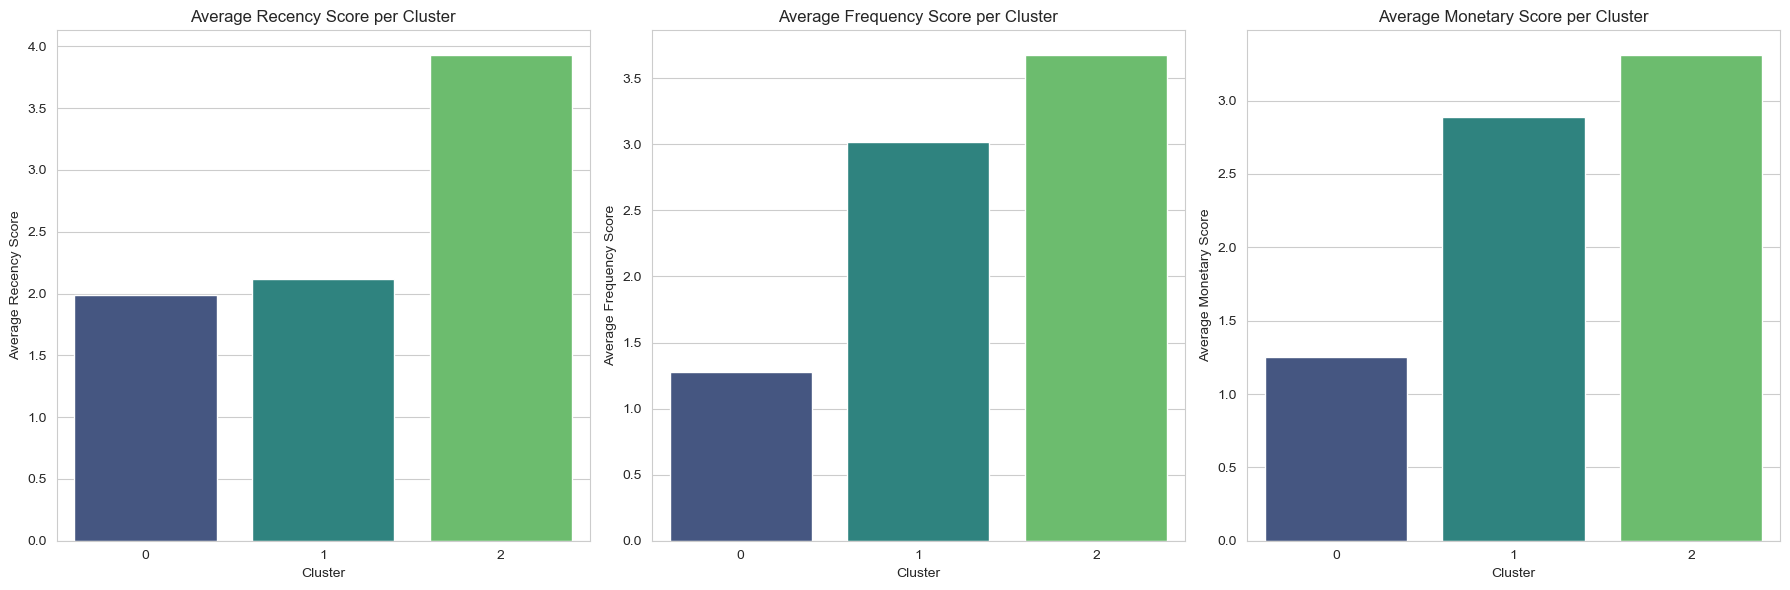

In [170]:
# Plot the average RFM scores for each cluster
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='Cluster', y='R_Score', data=cluster_summary, palette=cluster_colors)
plt.title('Average Recency Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Recency Score')

plt.subplot(1, 3, 2)
sns.barplot(x='Cluster', y='F_Score', data=cluster_summary, palette=cluster_colors)
plt.title('Average Frequency Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Frequency Score')

plt.subplot(1, 3, 3)
sns.barplot(x='Cluster', y='M_Score', data=cluster_summary, palette=cluster_colors)
plt.title('Average Monetary Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Monetary Score')

plt.tight_layout()
plt.show()

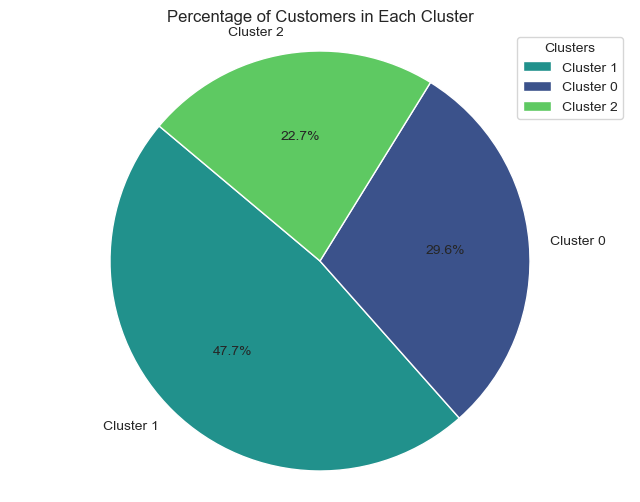

In [171]:
# Plot the percentage of customers in each cluster
plt.figure(figsize=(8, 6))
colors = [cluster_colors[cluster] for cluster in cluster_percentage['Cluster']]
plt.pie(cluster_percentage['Percentage'], labels=[f'Cluster {i}' for i in cluster_percentage['Cluster']], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Clusters', loc='best')
plt.show()

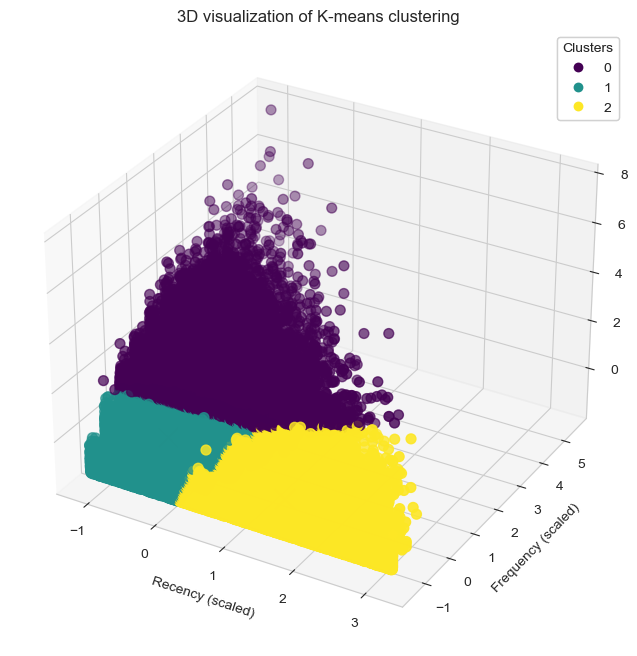

In [172]:
# Step 3: Plot the 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot data points
scatter = ax.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], rfm_scaled[:, 2], 
                     c=rfm['Cluster'], cmap='viridis', s=50)

# Plot cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.5, marker='x')

# Labels and title
ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('MonetaryValue (scaled)')
ax.set_title('3D visualization of K-means clustering')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

#  Clustering for Age, Gender and Country using K-Means

In [176]:
# Select relevant columns
columns_of_interest = ['Age', 'Gender', 'Country']
df_selected = data[columns_of_interest]

In [177]:
# Drop rows with missing values in the columns of interest
df_selected = df_selected.dropna()

In [178]:
# Encode categorical variables
df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Country'], drop_first=True)

In [179]:
# Normalize the Age column
scaler = StandardScaler()
df_encoded['Age'] = scaler.fit_transform(df_encoded[['Age']])

In [180]:
# Display the first few rows of the cleaned and encoded dataset
df_encoded.head()

,Age,Gender_Male,Country_Canada,Country_Germany,Country_UK,Country_USA
0,-0.963831,True,False,True,False,False
1,-1.096977,False,False,False,True,False
2,0.833635,True,False,False,False,False
3,1.366217,True,True,False,False,False
4,-0.897258,True,False,False,True,False


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

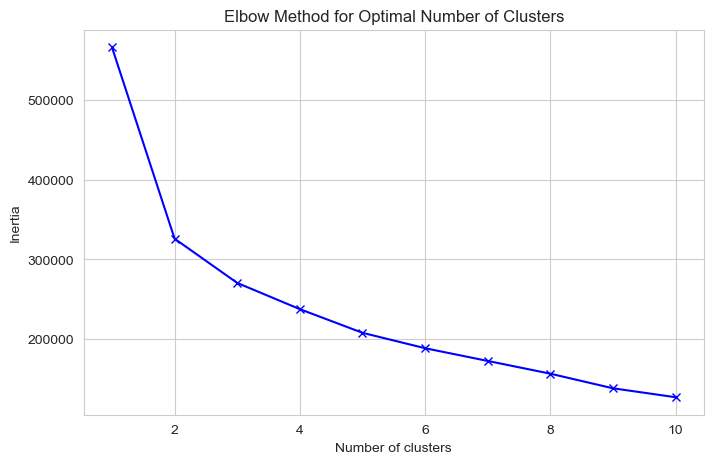

In [181]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [184]:
# From the elbow plot, the optimal number of clusters assumed to be 3 n
optimal_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)

# Add the cluster labels to the original DataFrame
df_selected['Cluster'] = df_encoded['Cluster']

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [185]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(df_encoded.drop(columns=['Cluster']), df_encoded['Cluster'])
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}')

# Calculate the Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(df_encoded.drop(columns=['Cluster']), df_encoded['Cluster'])
print(f'Davies-Bouldin Score for {optimal_clusters} clusters: {davies_bouldin_avg}')

Silhouette Score for 3 clusters: 0.31050363110634727
Davies-Bouldin Score for 3 clusters: 1.2743988608348256


In [186]:
# From the elbow plot, the optimal number of clusters assumed to be 4 in another case for comparison
optimal_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)

# Add the cluster labels to the original DataFrame
df_selected['Cluster'] = df_encoded['Cluster']

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [187]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(df_encoded.drop(columns=['Cluster']), df_encoded['Cluster'])
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}')

# Calculate the Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(df_encoded.drop(columns=['Cluster']), df_encoded['Cluster'])
print(f'Davies-Bouldin Score for {optimal_clusters} clusters: {davies_bouldin_avg}')

Silhouette Score for 4 clusters: 0.3502430863588391
Davies-Bouldin Score for 4 clusters: 1.2379417466665588


In [188]:
# Merge the cluster labels with the original DataFrame based on the indices
data['Cluster'] = df_selected['Cluster']

In [189]:
# Print the updated DataFrame with cluster numbers
data.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Age_Group,Datetime,Cluster
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,18-25,2023-09-18 22:03:55,2
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,18-25,2023-12-31 08:42:04,1
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,46-55,2023-04-26 04:06:29,3
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,56-65,2023-05-08 14:55:17,3
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,18-25,2024-01-10 16:54:07,1


In [190]:
# Save the updated DataFrame as a CSV file
csv_filename = 'updated_dataset_with_clusters.csv'
data.to_csv(csv_filename, index=False)

# Comparisons between each clusters

In [191]:
#sepeate each cluters into a seperate dataframe
data0 = data[data['Cluster'] == 0]
data1 = data[data['Cluster'] == 1]
data2 = data[data['Cluster'] == 2]
data3 = data[data['Cluster'] == 3]

In [192]:
# Display the first few rows of each cluster dataframe
print("Data for Cluster 0:")
data0.head(3)

Data for Cluster 0:


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Age_Group,Datetime,Cluster
17800,7751454.0,44993.0,Geoffrey Simpson,Sherry51@gmail.com,9.803129e+09,5432 Shah Brook,San Jose,Virginia,24427.0,USA,...,Furniture,Average,Express,PayPal,Delivered,2.0,Bed,18-25,2023-10-26 01:20:53,0
17807,6957575.0,82566.0,Carolyn Perkins,Cynthia17@gmail.com,3.011970e+09,87826 Adrian Port Apt. 736,Cleveland,Nevada,89413.0,USA,...,Non-Fiction,Excellent,Standard,PayPal,Delivered,4.0,Psychology,18-25,2024-02-27 19:20:44,0
17815,3615044.0,41633.0,Rebecca Aguilar,Brooke17@gmail.com,1.014957e+09,452 Serrano Orchard Apt. 020,Philadelphia,Colorado,81641.0,USA,...,Shoes,Good,Same-Day,Cash,Delivered,3.0,Sneakers,18-25,2023-12-11 07:15:37,0


In [193]:
print("\nData for Cluster 1:")
data1.head(3)


Data for Cluster 1:


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Age_Group,Datetime,Cluster
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,18-25,2023-12-31 08:42:04,1
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,18-25,2024-01-10 16:54:07,1
11,1609659.0,66883.0,Brianna Oconnor,David47@gmail.com,9.398169e+09,95471 Jerry Hollow Suite 034,Portsmouth,England,91253.0,UK,...,Non-Fiction,Average,Standard,Credit Card,Pending,2.0,Science,26-35,2023-06-21 13:09:58,1


In [194]:
print("\nData for Cluster 2:")
data2.head(3)


Data for Cluster 2:


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Age_Group,Datetime,Cluster
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,18-25,2023-09-18 22:03:55,2
6,5434096.0,97285.0,Erin Lewis,Arthur76@gmail.com,1.578355e+09,600 Brian Prairie Suite 497,Kitchener,Ontario,47545.0,Canada,...,Television,Bad,Standard,Cash,Processing,1.0,QLED TV,26-35,2023-06-26 13:35:51,2
7,2344675.0,26603.0,Angela Fields,Tanya94@gmail.com,3.668096e+09,237 Young Curve,Munich,Berlin,86862.0,Germany,...,Shirt,Bad,Same-Day,Cash,Processing,1.0,Dress shirt,26-35,2023-03-24 10:12:56,2


In [195]:
print("\nData for Cluster 3:")
data3.head(3)


Data for Cluster 3:


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Age_Group,Datetime,Cluster
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,46-55,2023-04-26 04:06:29,3
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,56-65,2023-05-08 14:55:17,3
5,6095326.0,41289.0,Ryan Johnson,Haley12@gmail.com,3.292677e+09,532 Ashley Crest Suite 014,Brisbane,New South Wales,74430.0,Australia,...,Tablet,Good,Express,PayPal,Pending,4.0,Lenovo Tab,56-65,2023-09-21 23:24:27,3


In [196]:
# Group by cluster and calculate mean age
age_comparison = df_selected.groupby('Cluster')['Age'].mean().reset_index()

# Count of gender by cluster
gender_comparison = df_selected.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)

# Count of country by cluster
country_comparison = df_selected.groupby(['Cluster', 'Country']).size().unstack().fillna(0)

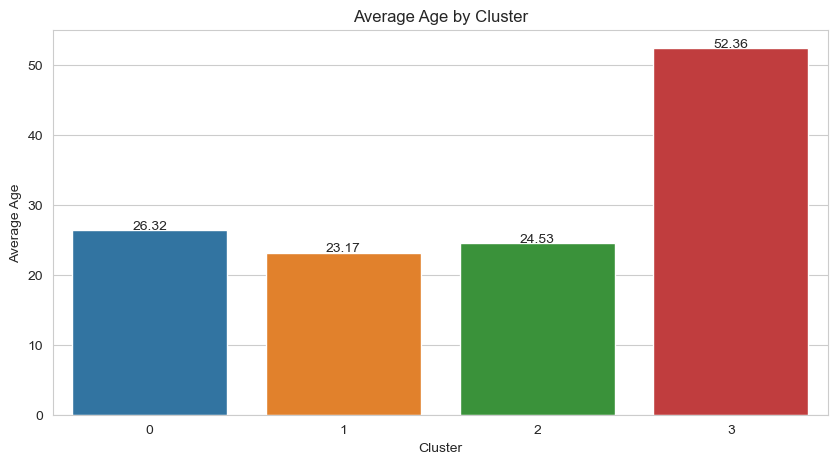

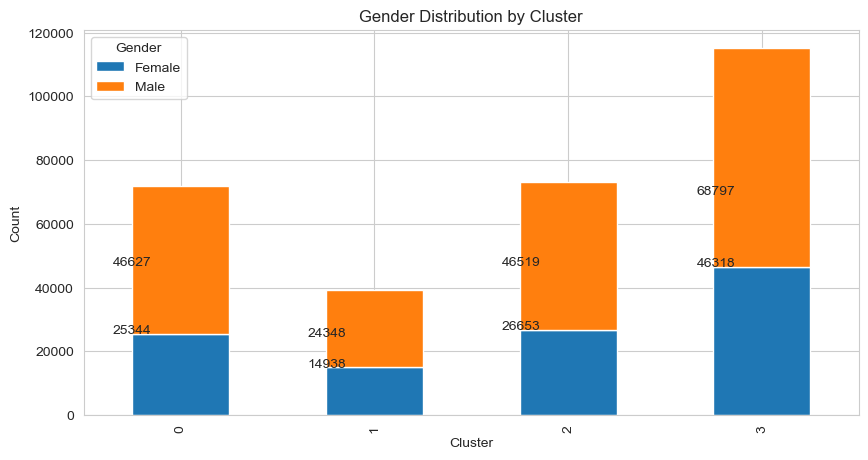

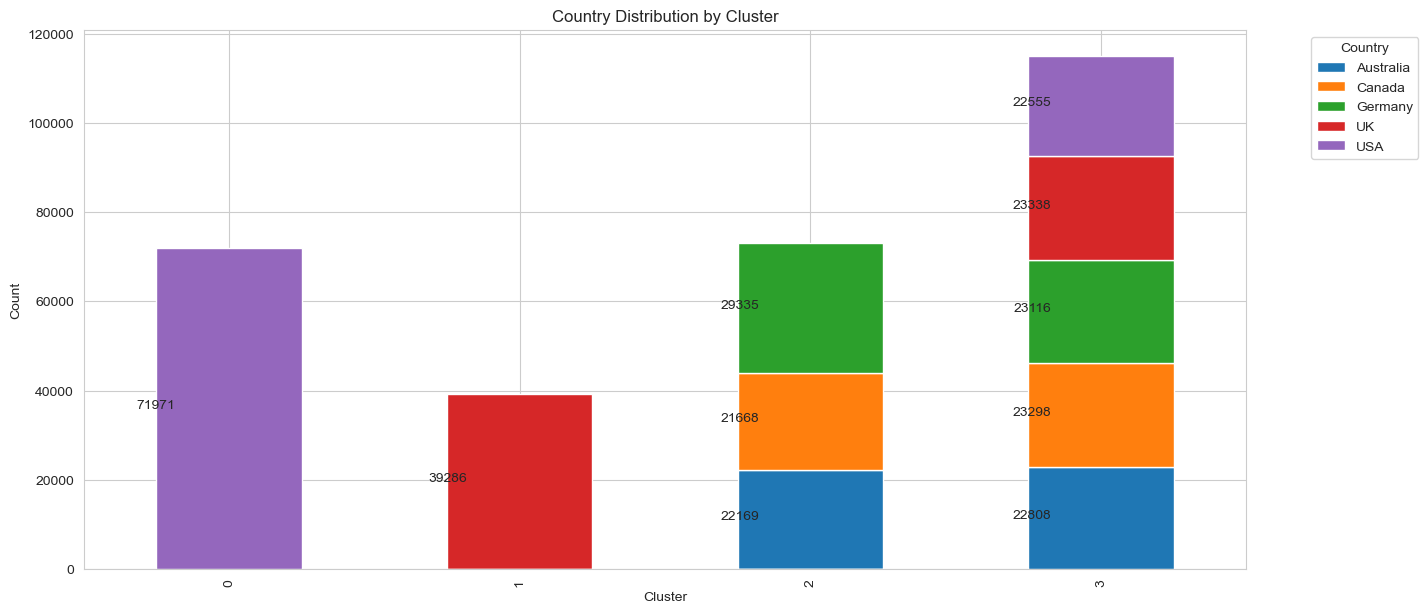

In [197]:
# Plotting the comparisons with labels and legend for countries

# Age comparison with labels
plt.figure(figsize=(10, 5))
sns.barplot(x='Cluster', y='Age', data=age_comparison)
plt.title('Average Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
for i in range(len(age_comparison)):
    plt.text(x=i, y=age_comparison['Age'][i] + 0.1, s=round(age_comparison['Age'][i], 2), ha='center')
plt.show()

# Gender comparison with labels
ax = gender_comparison.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() * 1.005, p.get_height() * 1.005), ha='center')
plt.show()

# Country comparison with labels and legend
ax = country_comparison.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Country Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() * 1.005, p.get_y() + height * 0.5), ha='center')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

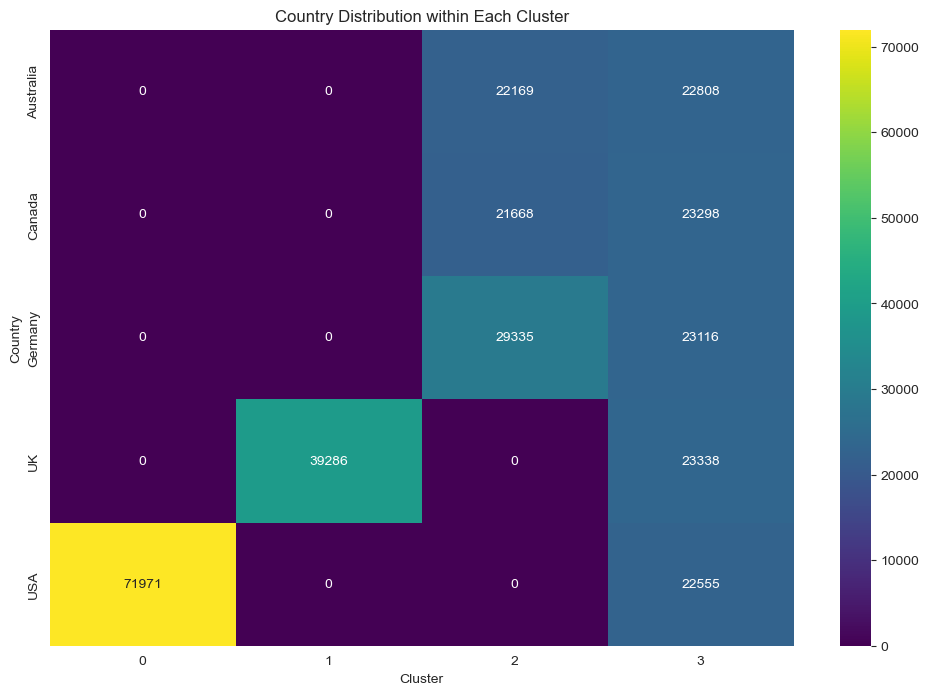

In [198]:
# Heatmap for Country Distribution within Each Cluster
country_cluster_counts = pd.crosstab(df_selected['Country'], df_selected['Cluster'])
plt.figure(figsize=(12, 8))
sns.heatmap(country_cluster_counts, annot=True, fmt='d', cmap='viridis')
plt.title('Country Distribution within Each Cluster')
plt.show()

In [214]:
# Finding the most bought product type for each cluster by males and Female

# Filter for entries where the gender is 'Male'
data_male = data[data['Gender'] == 'Male']

# Group by Cluster and Product_Type, then count the number of purchases
grouped_data = data_male.groupby(['Cluster', 'Product_Type']).size().reset_index(name='Purchase_Count')

# Find the most bought product type for each cluster
most_bought_product_type = grouped_data.loc[grouped_data.groupby('Cluster')['Purchase_Count'].idxmax()]

# Display the result
print(most_bought_product_type)

# Filter for entries where the gender is 'Female'
data_female = data[data['Gender'] == 'Female']

# Group by Cluster and Product_Type, then count the number of purchases
grouped_data_female = data_female.groupby(['Cluster', 'Product_Type']).size().reset_index(name='Purchase_Count')

# Find the most bought product type for each cluster
most_bought_product_type_female = grouped_data_female.loc[grouped_data_female.groupby('Cluster')['Purchase_Count'].idxmax()]

# Display the result
print(most_bought_product_type_female)

     Cluster Product_Type  Purchase_Count
32         0        Water            7429
41         1      Fiction            1527
75         2       Fridge            3989
122        3   Smartphone            4408
     Cluster Product_Type  Purchase_Count
31         0        Water            4573
55         1   Smartphone            1004
87         2   Smartphone            1750
115        3  Non-Fiction            2966


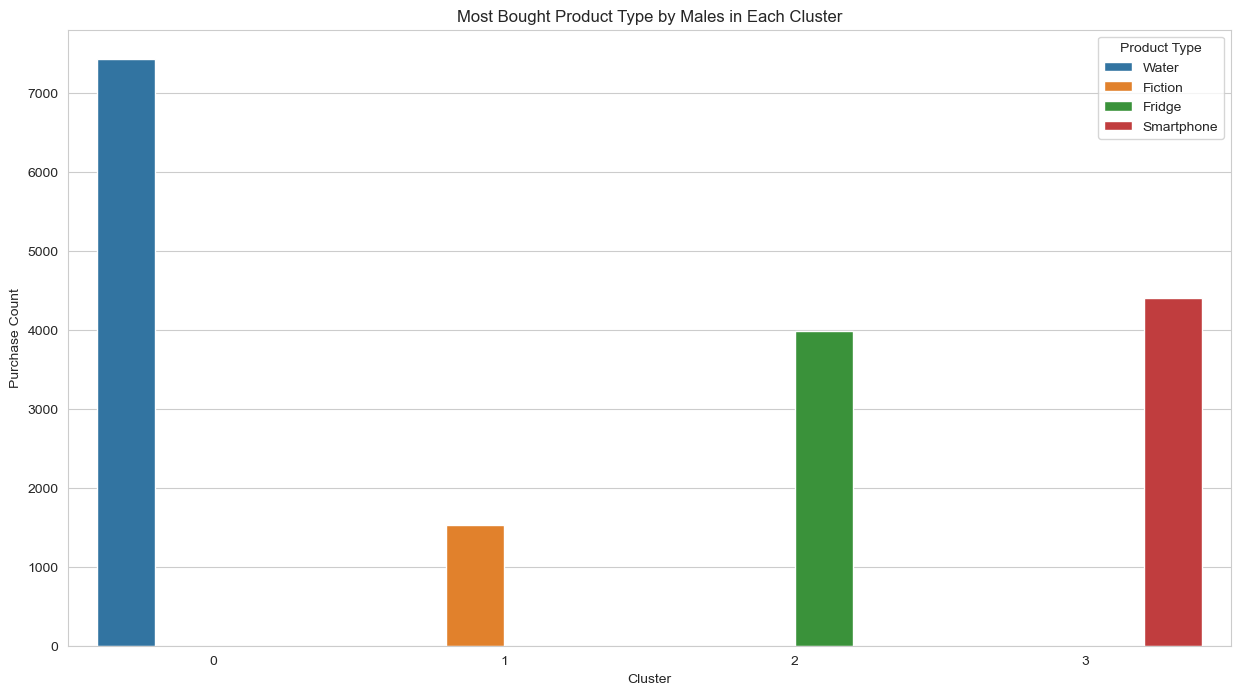

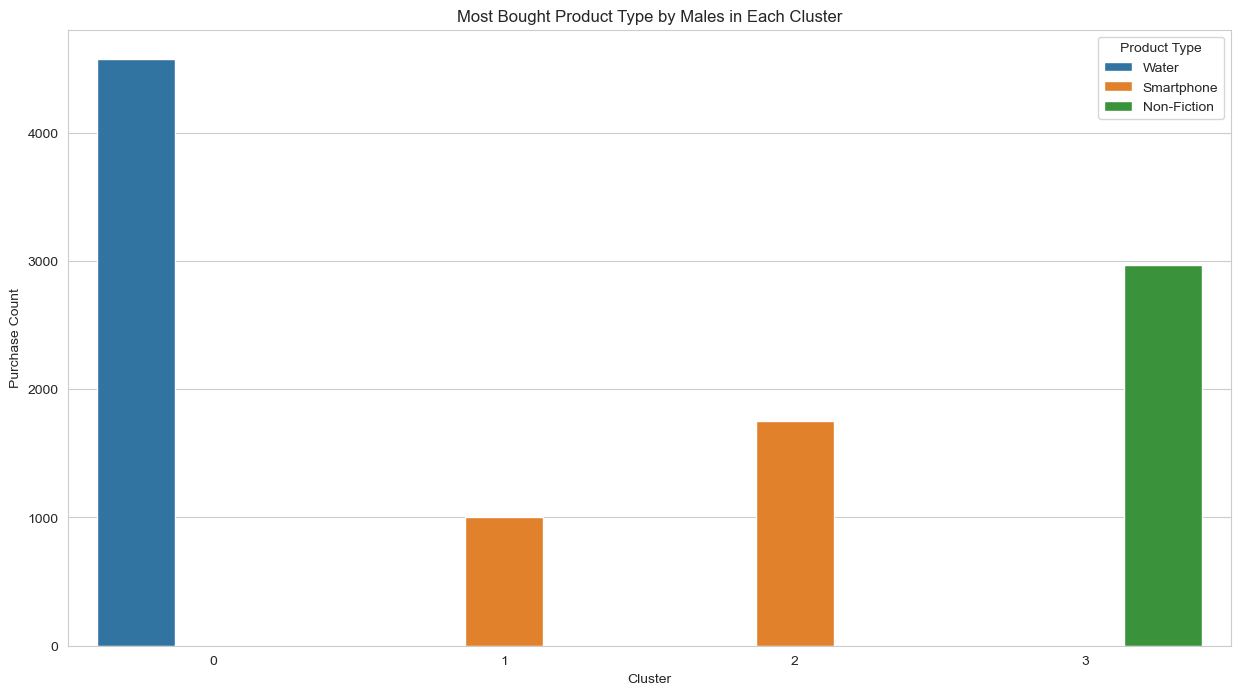

In [215]:
#plot the most bought product type by males in each cluster
plt.figure(figsize=(15, 8))
sns.barplot(data=most_bought_product_type, x='Cluster', y='Purchase_Count', hue='Product_Type')
plt.title('Most Bought Product Type by Males in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Count')
plt.legend(title='Product Type')
plt.show()

#plot the most bought product type by males in each cluster
plt.figure(figsize=(15, 8))
sns.barplot(data=most_bought_product_type_female, x='Cluster', y='Purchase_Count', hue='Product_Type')
plt.title('Most Bought Product Type by Males in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Count')
plt.legend(title='Product Type')
plt.show()